In [51]:
import numpy as np
import matplotlib.pyplot as plt

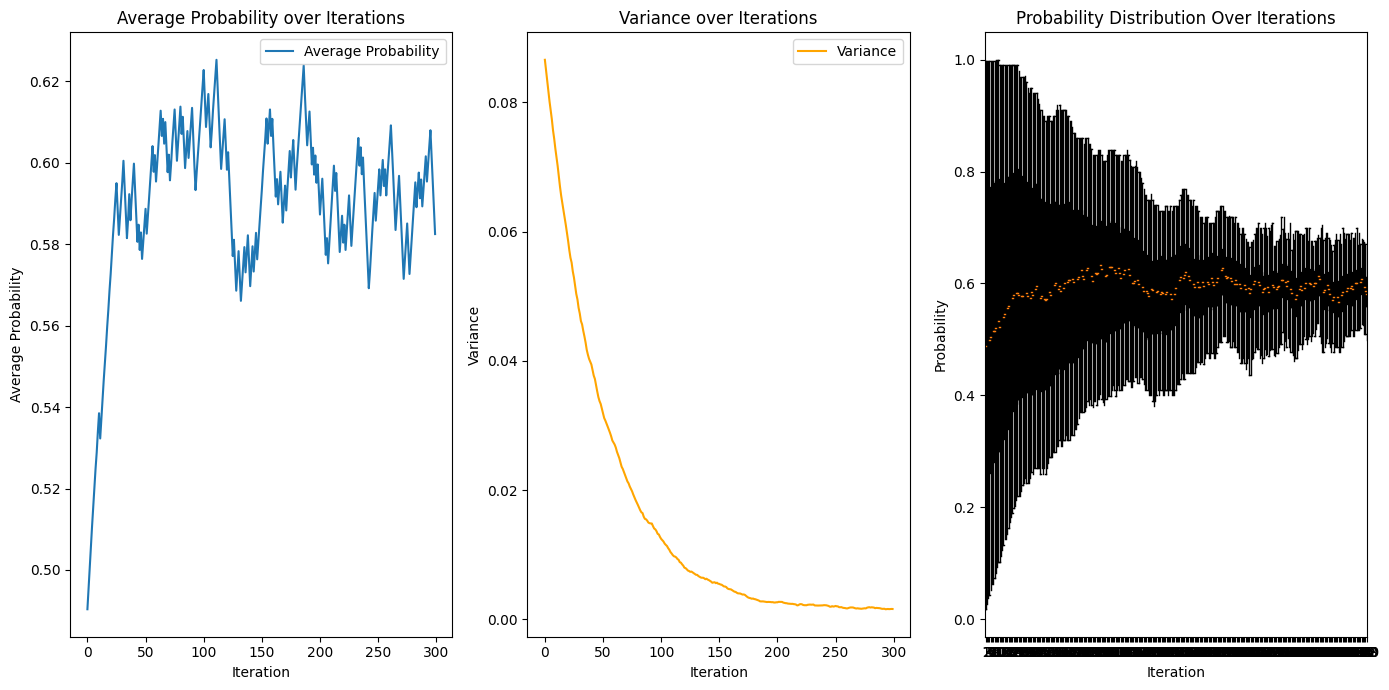

In [52]:
'''El Farol Bar Game'''

# Initialize parameters
num_people = 100
threshold = 0.6
probability_change = 0.01
iterations = 300  # How many iterations to run

# Initialize the probability of each person going to El Farol
probabilities = np.random.rand(num_people)

# Used to store the average probability and variance after each iteration
average_probabilities = []
variances = []

# Used to store the probability after each iteration for boxplot
probability_history = []

# Run the simulation
for i in range(iterations):
    # Decide whether each person goes to El Farol
    decisions = np.random.rand(num_people) < probabilities

    # Calculate the number of people going to El Farol
    num_going = decisions.sum()

    # Update the probability of going to El Farol
    if num_going > num_people * threshold:
        probabilities[decisions] -= probability_change
    else:
        probabilities[~decisions] += probability_change

    probabilities = np.clip(probabilities, 0, 1)

    # Calculate and store the average probability and variance for this iteration
    average_probability = probabilities.mean()
    variance = probabilities.var()
    average_probabilities.append(average_probability)
    variances.append(variance)

    # Store the probability for this iteration for boxplot
    probability_history.append(probabilities.copy())

# Plot the average probability and variance after each iteration
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
plt.plot(average_probabilities, label='Average Probability')
plt.xlabel('Iteration')
plt.ylabel('Average Probability')
plt.title('Average Probability over Iterations')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(variances, label='Variance', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Variance')
plt.title('Variance over Iterations')
plt.legend()

# Plot the probability after each iteration for boxplot
plt.subplot(1, 3, 3)
plt.boxplot(probability_history, showfliers=False)  # showfliers=False can hide outliers
plt.title('Probability Distribution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()


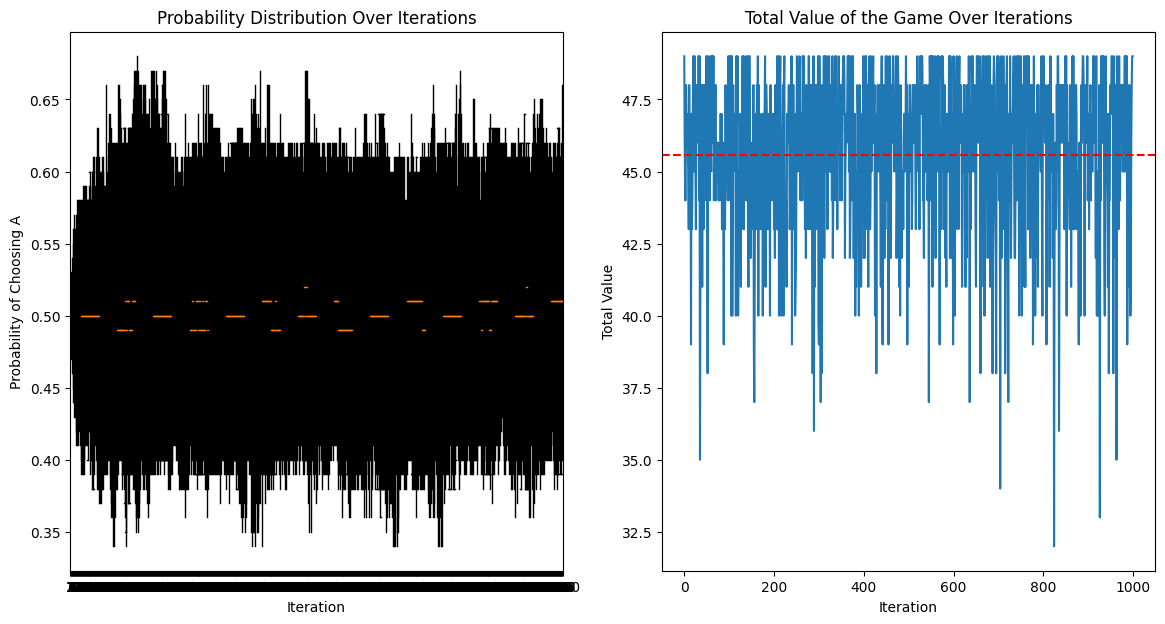

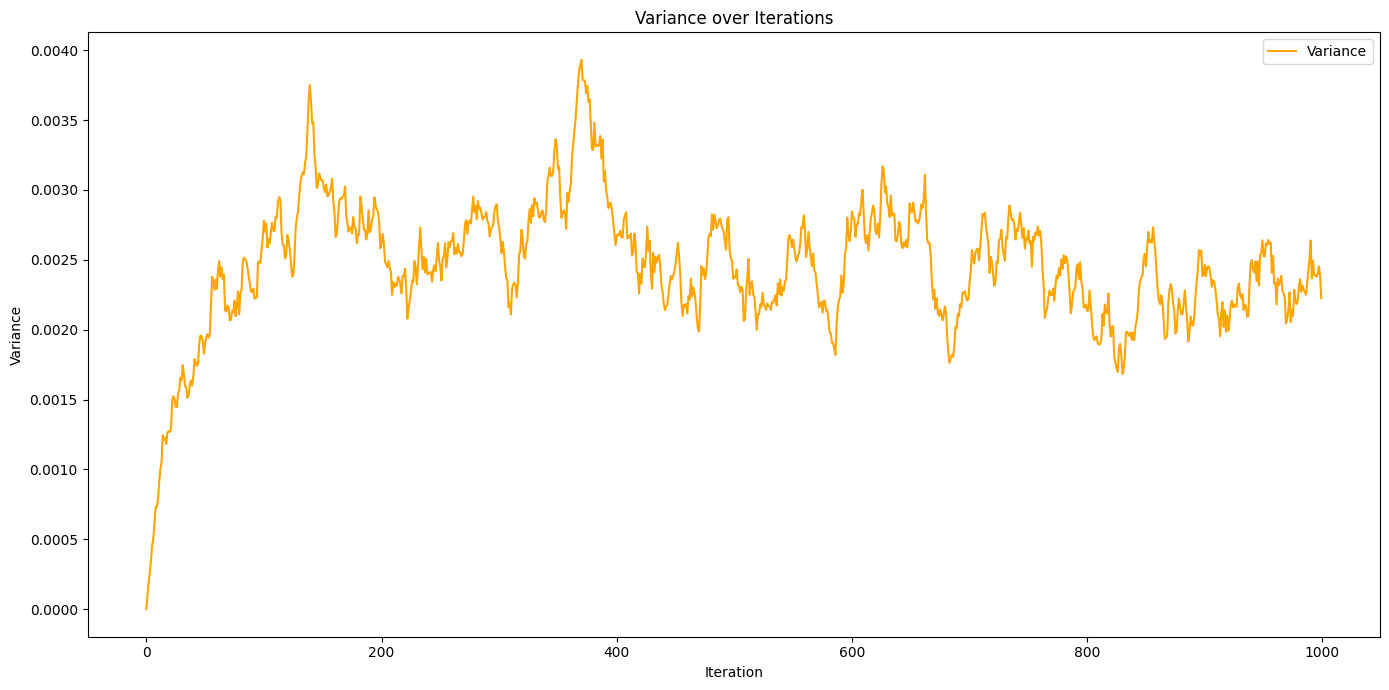

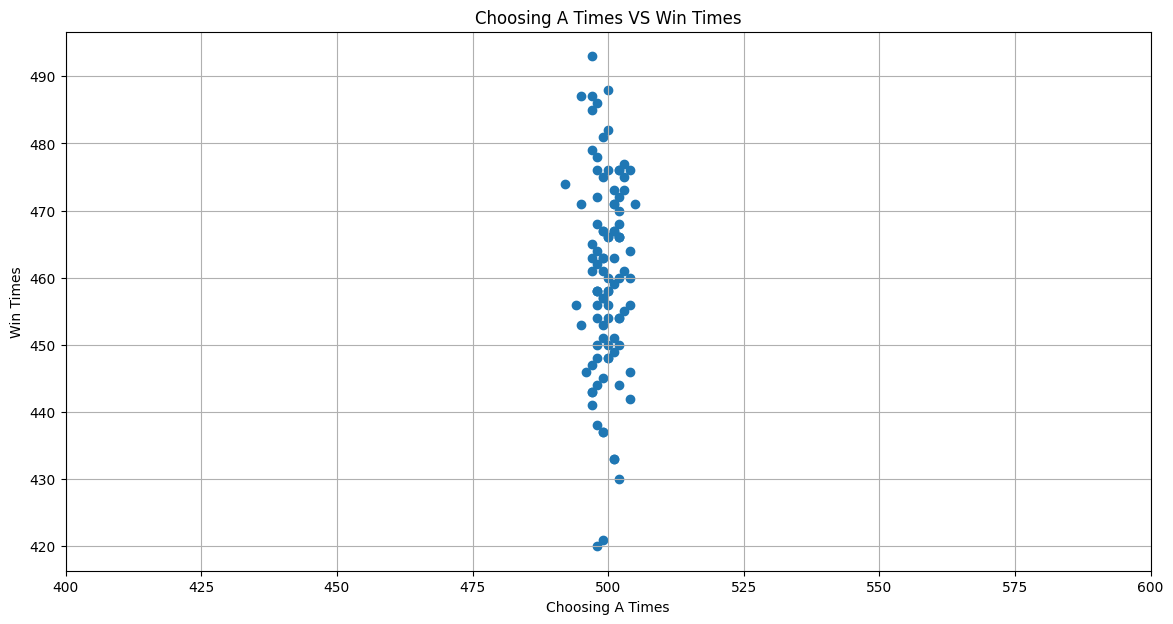

In [65]:
'''Minority Game'''

# Initialize parameters
num_players = 99
probability_change = 0.01
iterations = 1000  # How many iterations to run

# Initialize the probability of each player choosing A
# probabilities = np.full(num_players, 0.9)
probabilities = np.full(num_players, 0.5)

# Used to store the number of players choosing A and variance after each iteration
win_loss_history = np.zeros((iterations, num_players))  # 输赢历史记录
choosing_history = np.zeros((iterations, num_players))  # 选择A的历史记录
variances = []
total_values = []

# Used to store the probability after each iteration for boxplot
probability_history = []

# Run the simulation
for i in range(iterations):
    # Decide the choice of each player
    decisions = np.random.rand(num_players) < probabilities
    num_A = np.sum(decisions)
    num_B = num_players - num_A

    choosing_history[i] = decisions
    variances.append(np.var(probabilities))
    total_values.append(np.min([num_A, num_B]))

    if num_A < num_B:
        probabilities[~decisions] += probability_change
        probabilities[decisions] -= probability_change
        win_loss_history[i] = decisions
    elif num_B < num_A:
        probabilities[decisions] -= probability_change
        probabilities[~decisions] += probability_change
        win_loss_history[i] = ~decisions

    probabilities = np.clip(probabilities, 0, 1)

    # Store the probability for this iteration for boxplot
    probability_history.append(probabilities.copy())

# Plot the number of players choosing A and variance after each iteration
plt.figure(figsize=(14, 7))

# Plot the number of players choosing A
# plt.subplot(1, 3, 1)
# plt.plot(choices_A, label='Number of players choosing A')
# plt.xlabel('Iteration')
# plt.ylabel('Number of Choices for A')
# plt.title('Choices for A over Iterations')
# plt.axhline(y=num_players / 2, color='r', linestyle='--', label='Half the players')
# plt.legend()

# # Plot the variance
# plt.subplot(1, 3, 2)
# plt.plot(variances, label='Variance', color='orange')
# plt.xlabel('Iteration')
# plt.ylabel('Variance')
# plt.title('Variance over Iterations')
# plt.legend()

# Plot the probability after each iteration for boxplot
plt.subplot(1, 2, 1)
plt.boxplot(probability_history, showfliers=False)
plt.title('Probability Distribution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Probability of Choosing A')

plt.subplot(1, 2, 2)
plt.plot(total_values)
plt.axhline(y=np.mean(total_values[200:]), color='r', linestyle='--', label='Game Value Converged')
plt.title('Total Value of the Game Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Total Value')

# 绘制variance的变化图表
plt.figure(figsize=(14, 7))
plt.plot(variances, label='Variance', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Variance')
plt.title('Variance over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# 将所有玩家的选择和输赢历史关联起来，计算每个人选择A的次数与总的赢的次数的关系
# 计算每个人选择A的次数
choosing_history = choosing_history.T
choosing_A_times = np.sum(choosing_history, axis=1)
# 计算每个人赢的次数
win_loss_history = win_loss_history.T
win_times = np.sum(win_loss_history, axis=1)
# 计算每个人选择A的次数与总的赢的次数的关系
plt.figure(figsize=(14, 7))
plt.xlim(400, 600)
# plt.ylim(0, 1)
plt.scatter(choosing_A_times, win_times)
plt.xlabel('Choosing A Times')
plt.ylabel('Win Times')
plt.title('Choosing A Times VS Win Times')
plt.grid(True)
plt.show()


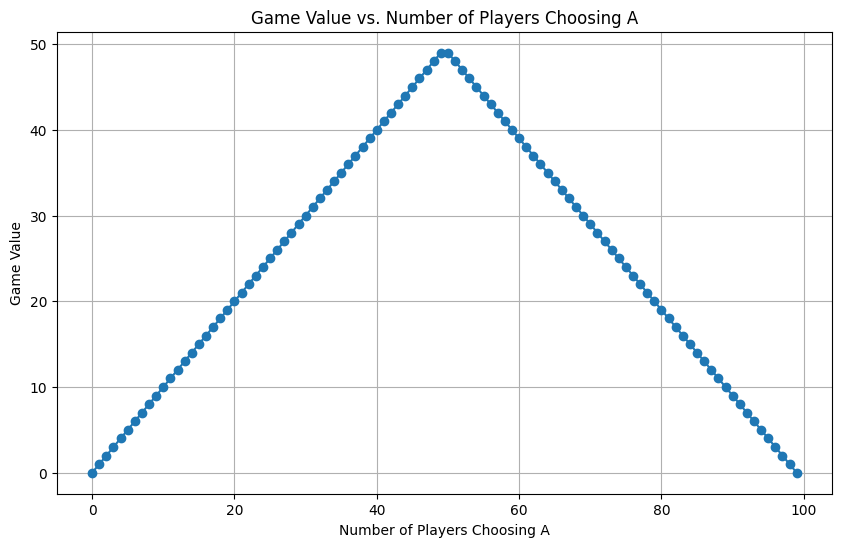

In [54]:
# Total number of players
num_players = 99

# Assume the number of players choosing A varies from 0 to 99
choices_A = np.arange(0, num_players + 1)

# Calculate the Game Value for each number of players choosing A
# Game Value is the number of players choosing the minority
game_values = np.minimum(choices_A, num_players - choices_A)

# Plot the chart
plt.figure(figsize=(10, 6))
plt.plot(choices_A, game_values, marker='o')
plt.xlabel('Number of Players Choosing A')
plt.ylabel('Game Value')

# Set the title and display the grid
plt.title('Game Value vs. Number of Players Choosing A')
plt.grid(True)
plt.show()


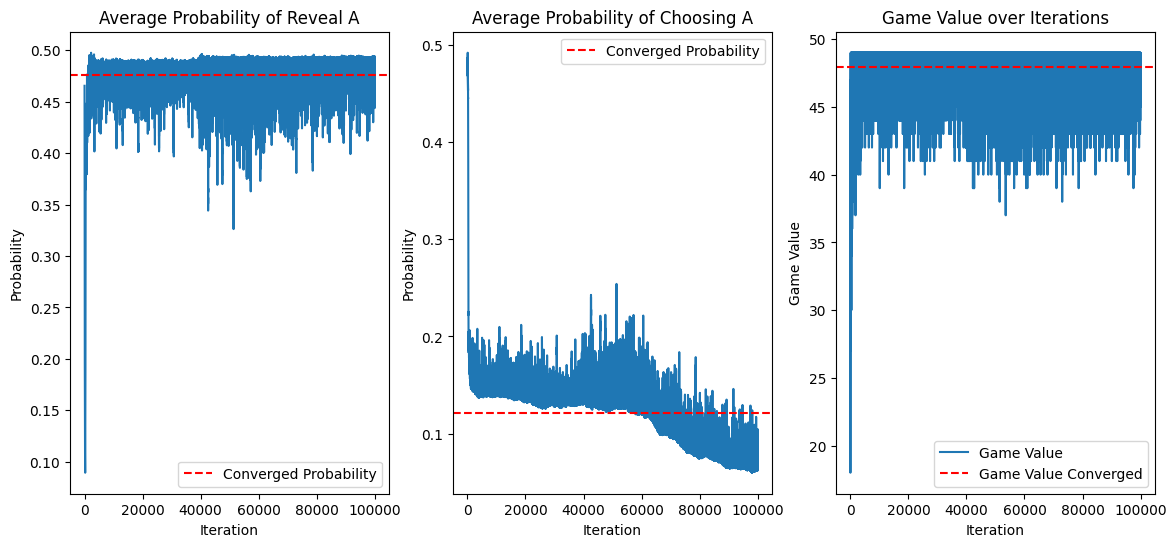

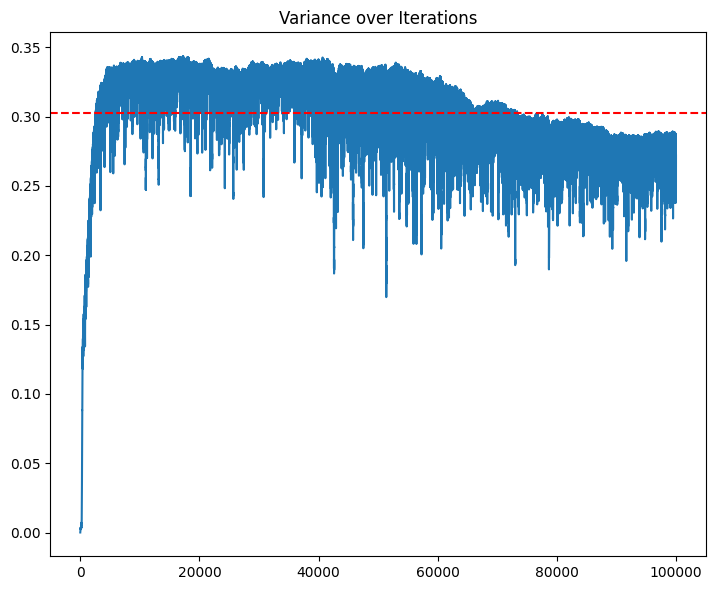

[0.02149556 0.96832133 0.01979156 0.01715644 0.96849944 0.96831844
 0.97114244 0.01788889 0.01712822 0.01852033 0.01881622 0.02110911
 0.96822444 0.01655133 0.97011167 0.96799544 0.02228944 0.01762611
 0.01989244 0.97109756 0.96733678 0.96853644 0.01831478 0.96806367
 0.017969   0.01802778 0.96758811 0.96833233 0.01846411 0.01751911
 0.01880178 0.01688089 0.96835722 0.96782433 0.017364   0.96788544
 0.96866656 0.01816333 0.96784489 0.01724367 0.97019222 0.96977244
 0.02044144 0.96750878 0.01765678 0.02129733 0.01787578 0.96784222
 0.97013833 0.96752456 0.01695256 0.97044456 0.02163067 0.967041
 0.01778122 0.96832611 0.01745722 0.018046   0.01859678 0.971239
 0.018163   0.96784778 0.96813133 0.01728767 0.01647344 0.01709778
 0.01746578 0.96817967 0.96827511 0.96813311 0.01551222 0.01865867
 0.01922222 0.01686633 0.66178367 0.02067844 0.96793533 0.97104289
 0.96857667 0.967807   0.01674089 0.96726667 0.96742011 0.96701311
 0.96999944 0.02071467 0.97042611 0.96859044 0.01879733 0.96752144

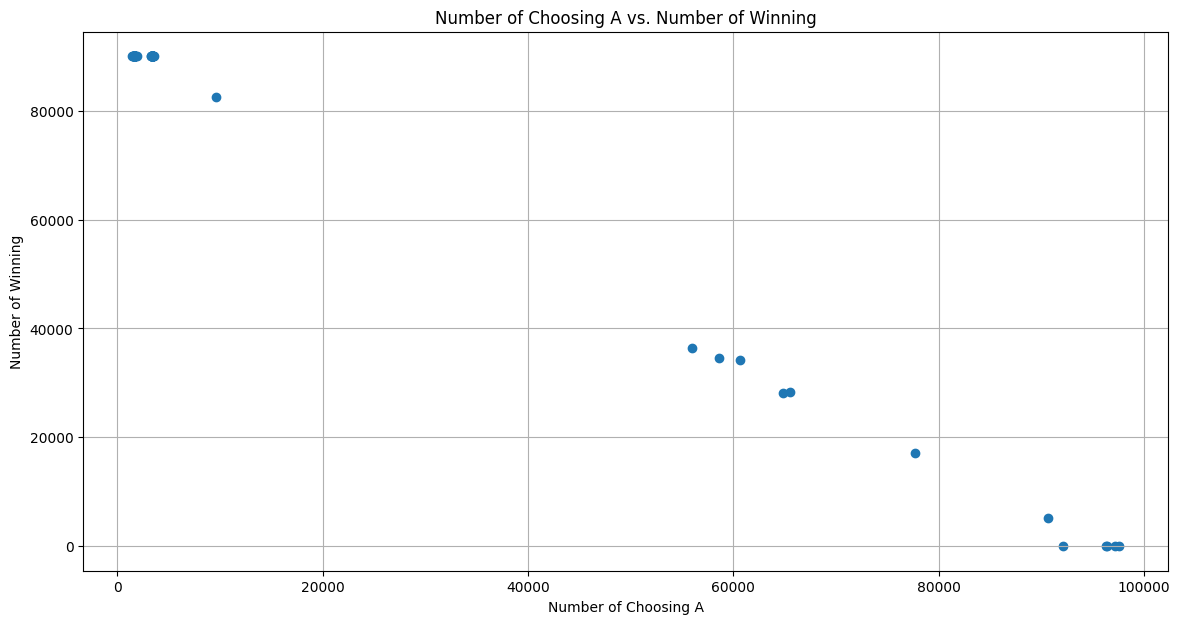

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化参数
num_players = 99
probability_change = 0.01
iterations = 100000  # 运行多少次迭代

# 初始化所有玩家宣布选择A的概率a和实际选择A的概率b
prob_announce_a = np.full(num_players, 0.47)
prob_choose_a = np.full(num_players, 0.47)

# 用于存储每次迭代的数据
history_announce = []
history_choose = []
game_values = []  # 每轮游戏的value

# 运行模拟
for _ in range(iterations):
    # 第一轮选择：宣布选择A
    announce_decisions = np.random.rand(num_players) < prob_announce_a
    num_announce_a = announce_decisions.sum()

    # 第二轮选择：剩余玩家的决定
    remaining_players = ~announce_decisions
    choose_decisions = np.random.rand(num_players) < prob_choose_a
    num_choose_a = choose_decisions[remaining_players].sum()
    total_a = num_announce_a + num_choose_a
    total_b = remaining_players.sum() - num_choose_a

    # 计算并存储Game Value
    game_value = min(total_a, total_b)
    game_values.append(game_value)

    # 更新概率
    if total_a < num_players / 2:  # A是少数方
        prob_announce_a[announce_decisions] += probability_change
        prob_choose_a[choose_decisions & remaining_players] += probability_change
        prob_choose_a[~choose_decisions & remaining_players] -= probability_change
    else:  # B是少数方
        prob_announce_a[announce_decisions] -= probability_change
        prob_choose_a[choose_decisions & remaining_players] -= probability_change
        prob_choose_a[~choose_decisions & remaining_players] += probability_change

    prob_announce_a = np.clip(prob_announce_a, 0.01, 1)
    prob_choose_a = np.clip(prob_choose_a, 0.01, 1)

    history_announce.append(prob_announce_a.copy())
    history_choose.append(prob_choose_a.copy())

# 计算概率的最终收敛值
final_announce_prob = np.mean(history_announce[10000:], axis=0)
final_choose_prob = np.mean(history_choose[10000:], axis=0)

# 绘制图表
plt.figure(figsize=(14, 6))

# 绘制宣布选择A的概率变化
plt.subplot(1, 3, 1)
plt.plot(np.mean(history_announce, axis=1))
plt.axhline(y=np.mean(final_announce_prob), color='r', linestyle='--', label='Converged Probability')
plt.title('Average Probability of Reveal A')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.legend()

# 绘制实际选择A的概率变化
plt.subplot(1, 3, 2)
plt.plot(np.mean(history_choose, axis=1))
plt.axhline(y=np.mean(final_choose_prob), color='r', linestyle='--', label='Converged Probability')
plt.title('Average Probability of Choosing A')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.legend()

# 绘制每轮游戏的Game Value
plt.subplot(1, 3, 3)
plt.plot(game_values, label='Game Value')
plt.axhline(y=np.mean(game_values[10000:]), color='r', linestyle='--', label='Game Value Converged')
plt.title('Game Value over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Game Value')
plt.legend()

# 绘制每轮游戏选择A和B的varriance(选择announce的要合并进后续选择的里)每轮游戏只考虑选择A和B的varriance
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
# 合并每轮游戏的两轮选择的varriance
var_announce = np.var(history_announce, axis=1)
var_choose = np.var(history_choose, axis=1)
var_total = var_announce + var_choose
plt.plot(var_total, label='Variance')
plt.axhline(y=np.mean(var_total[10000:]), color='r', linestyle='--', label='Variance Converged')
plt.title('Variance over Iterations')

plt.tight_layout()
plt.show()

print(final_announce_prob)
print(final_choose_prob)
print(np.mean(game_values[10000:]))

# 将所有玩家的选择和输赢历史关联起来，计算每个人选择A的次数与总的赢的次数的关系
# 用于存储每个人选择A的次数和总的赢的次数
num_choose_a = []
num_win = []
for i in range(num_players):
    # 计算每个人选择A的次数
    num_choose_a.append(np.mean(history_choose[10000:], axis=0)[i] * iterations)
    # 计算每个人总的赢的次数
    num_win.append(np.sum(np.array(history_choose[10000:])[:, i] < 0.5))

# 绘制图表
plt.figure(figsize=(14, 7))
plt.scatter(num_choose_a, num_win, marker='o')
plt.xlabel('Number of Choosing A')
plt.ylabel('Number of Winning')
plt.title('Number of Choosing A vs. Number of Winning')
plt.grid(True)
plt.show()


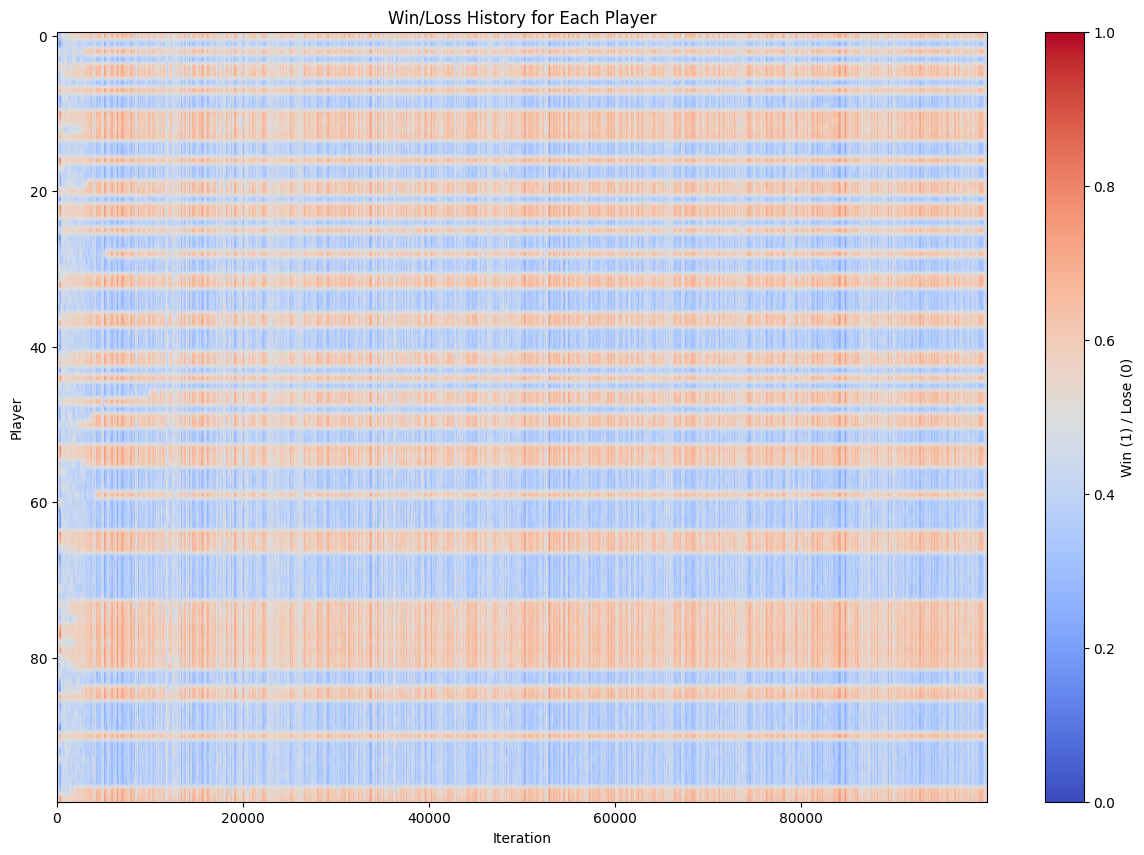

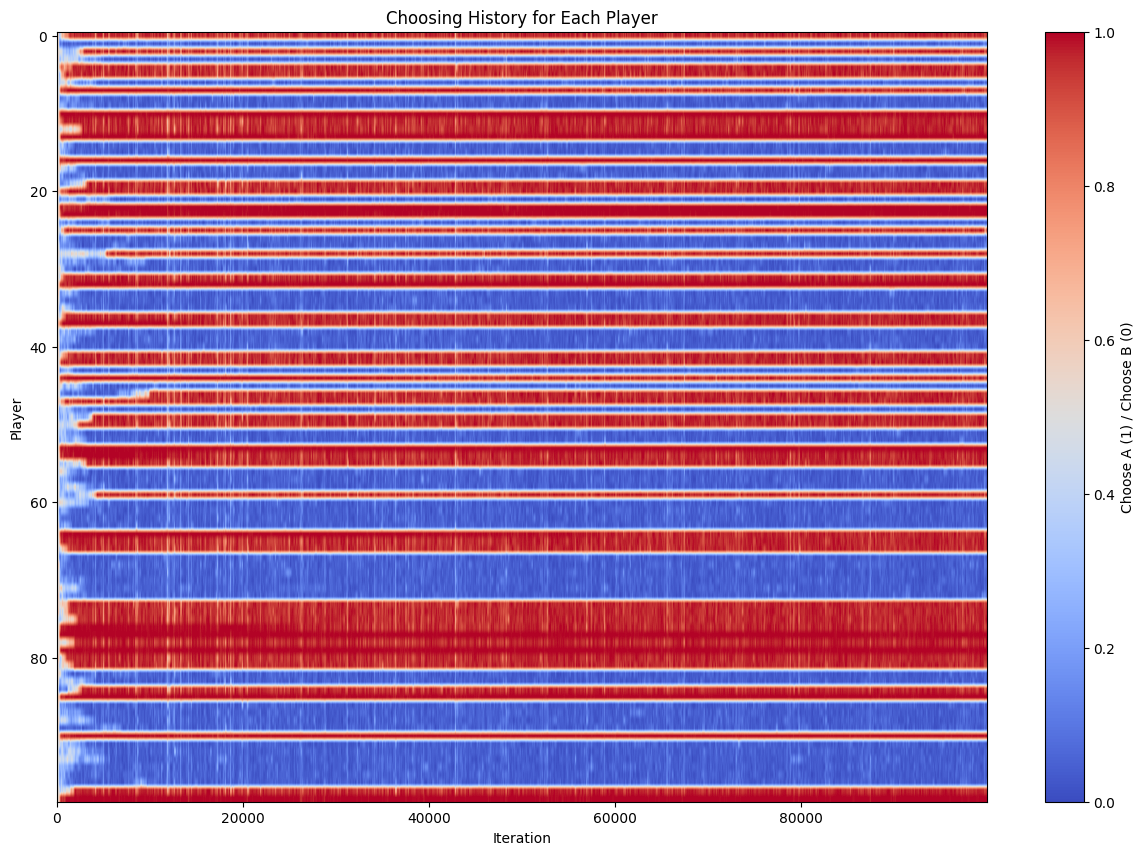

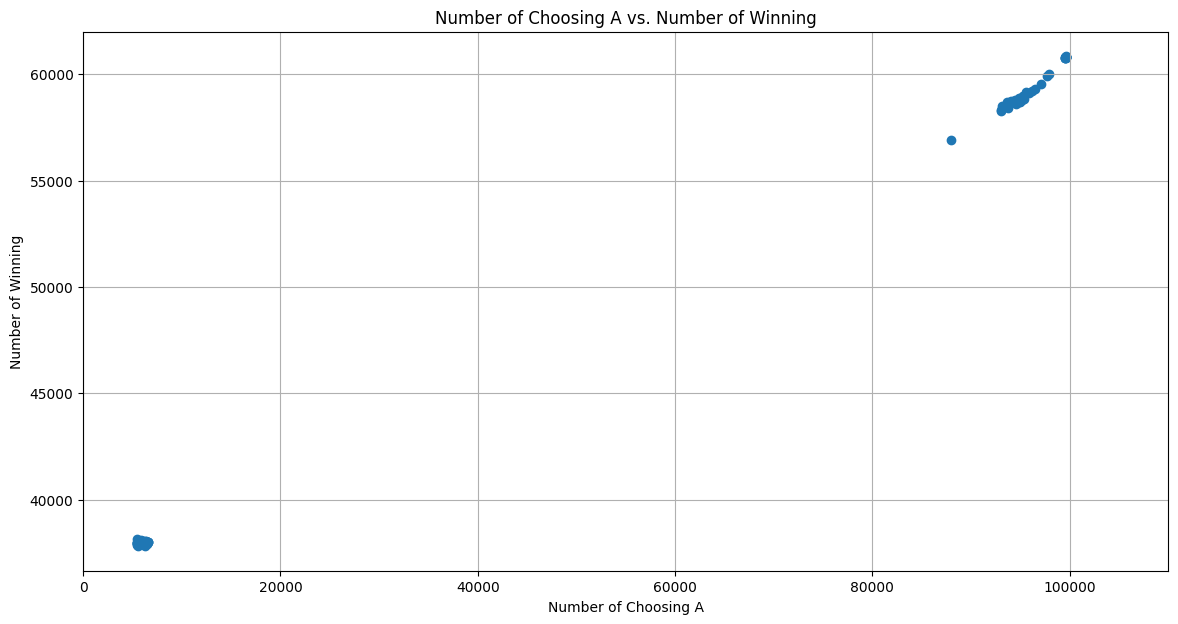

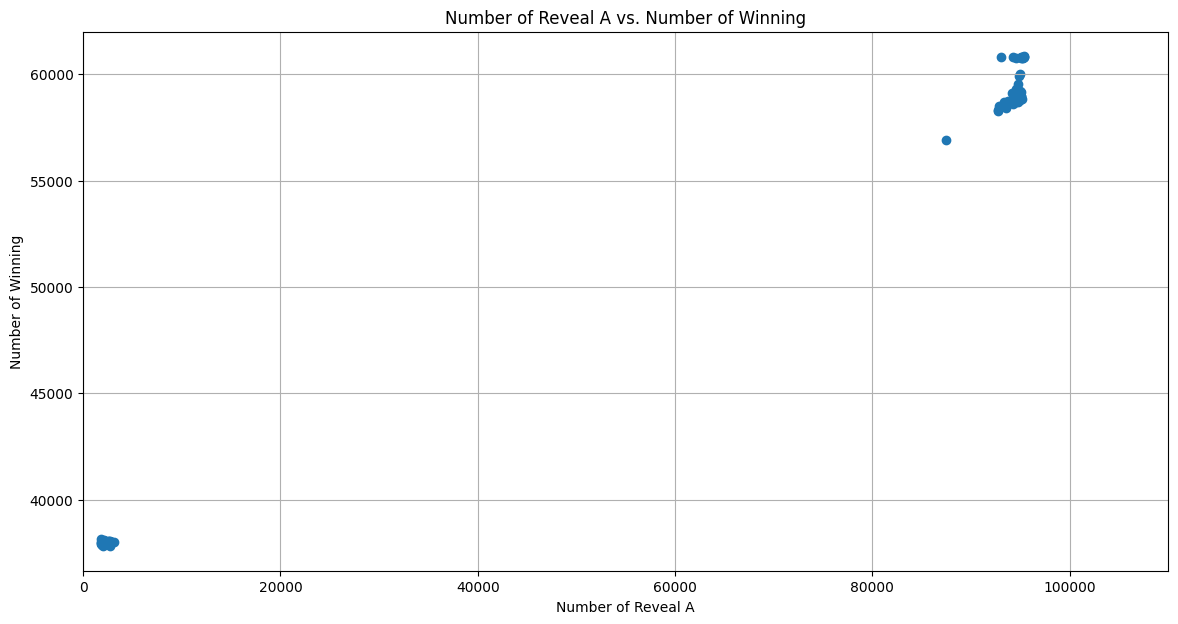

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化参数
num_players = 99
probability_change = 0.01
iterations = 100000  # 运行多少次迭代

# 初始化所有玩家宣布选择A的概率a和实际选择A的概率b
prob_announce_a = np.full(num_players, 0.5)
prob_choose_a = np.full(num_players, 0.5)

# 用于存储每次迭代的数据
win_loss_history = np.zeros((iterations, num_players))  # 输赢历史记录
choosing_history = np.zeros((iterations, num_players))  # 选择A的历史记录
choosing_announce_history = np.zeros((iterations, num_players))  # 宣布选择A的历史记录

# 运行模拟
for iteration in range(iterations):
    # 第一轮选择：宣布选择A
    announce_decisions = np.random.rand(num_players) < prob_announce_a
    num_announce_a = announce_decisions.sum()

    # 第二轮选择：剩余玩家的决定
    remaining_players = ~announce_decisions
    choose_decisions = np.random.rand(num_players) < prob_choose_a
    num_choose_a = choose_decisions[remaining_players].sum()
    total_a = num_announce_a + num_choose_a
    total_b = remaining_players.sum() - num_choose_a

    choosing_history[iteration, announce_decisions | choose_decisions] = 1  # 宣布选择A的玩家
    choosing_announce_history[iteration, announce_decisions] = 1  # 宣布选择A的玩家
    # 更新概率
    if total_a < num_players / 2:  # A是少数方
        prob_announce_a[announce_decisions] += probability_change
        prob_choose_a[choose_decisions & remaining_players] += probability_change
        prob_choose_a[~choose_decisions & remaining_players] -= probability_change
        win_loss_history[iteration, announce_decisions] = 1  # 宣布选择A并且A是少数方的玩家赢
        win_loss_history[iteration, choose_decisions & remaining_players] = 1  # 选择A并且A是少数方的玩家赢
    else:  # B是少数方
        prob_announce_a[announce_decisions] -= probability_change
        prob_choose_a[choose_decisions & remaining_players] -= probability_change
        prob_choose_a[~choose_decisions & remaining_players] += probability_change
        win_loss_history[iteration, remaining_players & ~choose_decisions] = 1  # 选择B并且B是少数方的玩家赢

    prob_announce_a = np.clip(prob_announce_a, 0.01, 0.99)
    prob_choose_a = np.clip(prob_choose_a, 0.01, 0.99)

# 绘制所有玩家的输赢历史
plt.figure(figsize=(15, 10))
plt.imshow(win_loss_history.T, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Win (1) / Lose (0)')
plt.xlabel('Iteration')
plt.ylabel('Player')
plt.title('Win/Loss History for Each Player')
plt.show()

# 绘制所有玩家的选择A历史
plt.figure(figsize=(15, 10))
plt.imshow(choosing_history.T, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Choose A (1) / Choose B (0)')
plt.xlabel('Iteration')
plt.ylabel('Player')
plt.title('Choosing History for Each Player')
plt.show()

# 将所有玩家的选择和输赢历史关联起来，计算每个人选择A的次数（包含第一轮选择和第二轮选择）与总的赢的次数的关系
num_choose_a = choosing_history.sum(axis=0)
num_win = win_loss_history.sum(axis=0)
plt.figure(figsize=(14, 7))
plt.scatter(num_choose_a, num_win)
plt.grid(True)
plt.xlim(0, 110000)
plt.xlabel('Number of Choosing A')
plt.ylabel('Number of Winning')
plt.title('Number of Choosing A vs. Number of Winning')
plt.show()

# 将所有玩家的选择和输赢历史关联起来，计算每个人选择A的次数（只包含第一轮选择）与总的赢的次数的关系
num_choose_a = choosing_announce_history.sum(axis=0)
num_win = win_loss_history.sum(axis=0)
plt.figure(figsize=(14, 7))
plt.scatter(num_choose_a, num_win)
plt.grid(True)
plt.xlim(0, 110000)
plt.xlabel('Number of Reveal A')
plt.ylabel('Number of Winning')
plt.title('Number of Reveal A vs. Number of Winning')
plt.show()
